YOURCABS
* id - booking ID
* user_id - the ID of the customer (based on mobile number)
* vehicle_model_id - vehicle model type.
* package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs
& 30kms, 7=12hrs & 120kms)
* travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).
* from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages
* to_area_id - unique identifier of area. Applicable only for point-to-point travel
* from_city_id - unique identifier of city
* to_city_id - unique identifier of city (only for intercity)
* from_date - time stamp of requested trip start
* online_booking - if booking was done on desktop website
* mobile_site_booking - if booking was done on mobile website
* booking_created - time stamp of booking
* from_lat - latitude of from area
* from_long - longitude of from area
* to_lat - latitude of to area
* to_long - longitude of to area
* Car_Cancellation - whether the booking was cancelled (1) or not (0) due to unavailability of 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.option_context('mode.use_inf_as_na', True);

In [125]:
df = pd.read_csv("YourCabs.csv")

In [126]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [127]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [128]:
#checking counts of values of our target feature
df["Car_Cancellation"].value_counts()

Car_Cancellation
0    40299
1     3132
Name: count, dtype: int64

<Axes: xlabel='Car_Cancellation', ylabel='count'>

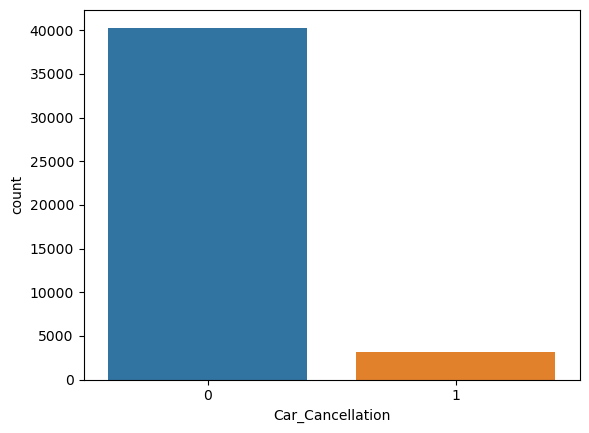

In [129]:
# Ploting countplot
sns.countplot(x = df["Car_Cancellation"])

#### Missing Values

In [130]:
# selecting only missing values
nan_feat = [feat for feat in df.columns if df[feat].isna().sum()>1]

In [131]:
df[nan_feat].head()

,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_lat,from_long,to_lat,to_long
0,NaN,83.0,448.0,NaN,NaN,12.924150,77.672290,12.927320,77.635750
1,NaN,1010.0,540.0,NaN,NaN,12.966910,77.749350,12.927680,77.626640
2,NaN,1301.0,1034.0,NaN,NaN,12.937222,77.626915,13.047926,77.597766
3,NaN,768.0,398.0,NaN,NaN,12.989990,77.553320,12.971430,77.639140
4,NaN,1365.0,849.0,NaN,NaN,12.845653,77.677925,12.954340,77.600720


In [132]:
for feat in nan_feat:
    print(feat+" --------->   ", df[feat].isna().sum())

package_id --------->    35881
from_area_id --------->    88
to_area_id --------->    9138
from_city_id --------->    27086
to_city_id --------->    41843
from_lat --------->    93
from_long --------->    93
to_lat --------->    9138
to_long --------->    9138


In [133]:
## checking id & user_id column

print(len(df)," ----> ",df["id"].nunique())
print(len(df)," ----> ",df["user_id"].nunique())

43431  ---->  43431
43431  ---->  22267


In [134]:
#description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,43431.0,159206.473556,15442.386279,132512.00000,145778.000000,159248.000000,172578.50000,185941.000000
user_id,43431.0,30739.198153,10996.476709,16.00000,24614.000000,31627.000000,39167.00000,48730.000000
vehicle_model_id,43431.0,25.717230,26.798250,1.00000,12.000000,12.000000,24.00000,91.000000
package_id,7550.0,2.030066,1.461756,1.00000,1.000000,2.000000,2.00000,7.000000
travel_type_id,43431.0,2.137252,0.437712,1.00000,2.000000,2.000000,2.00000,3.000000
from_area_id,43343.0,714.544494,419.883553,2.00000,393.000000,590.000000,1089.00000,1403.000000
to_area_id,34293.0,669.490917,400.638225,2.00000,393.000000,541.000000,1054.00000,1403.000000
from_city_id,16345.0,14.915081,1.165306,1.00000,15.000000,15.000000,15.00000,31.000000
to_city_id,1588.0,68.537783,49.880732,4.00000,32.000000,49.000000,108.00000,203.000000
online_booking,43431.0,0.351592,0.477473,0.00000,0.000000,0.000000,1.00000,1.000000


<Axes: xlabel='package_id', ylabel='count'>

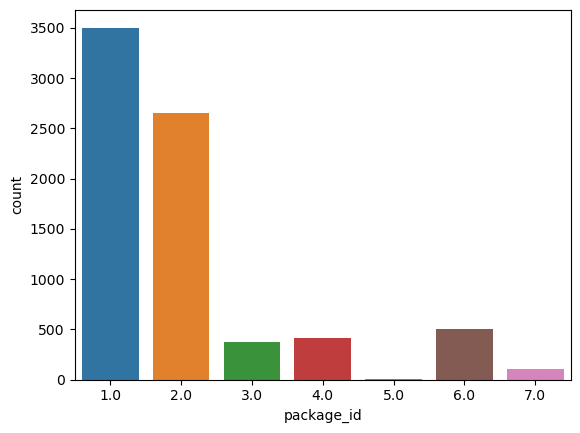

In [135]:
sns.countplot(x=df["package_id"])

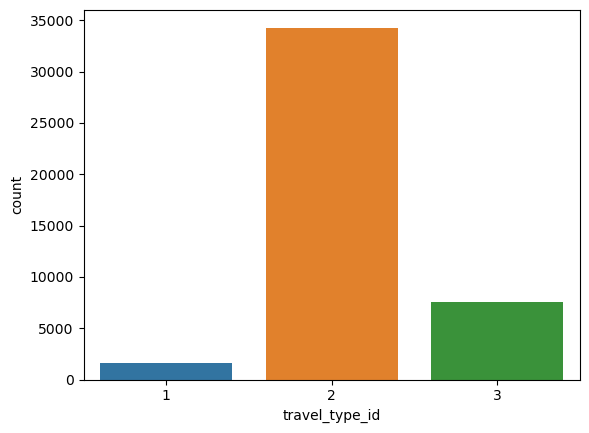

In [136]:
sns.countplot(x=df["travel_type_id"]);

<Axes: xlabel='online_booking', ylabel='count'>

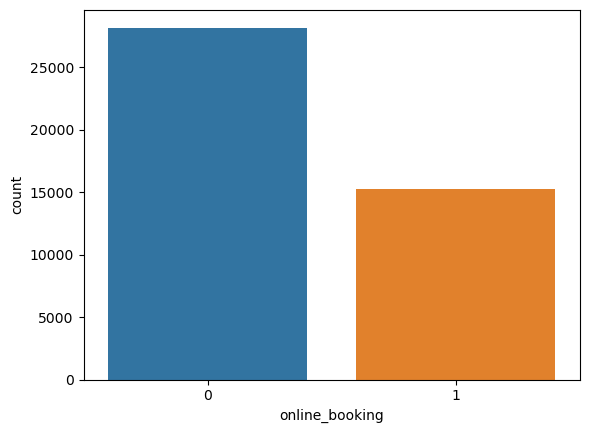

In [137]:
sns.countplot(x=df["online_booking"])

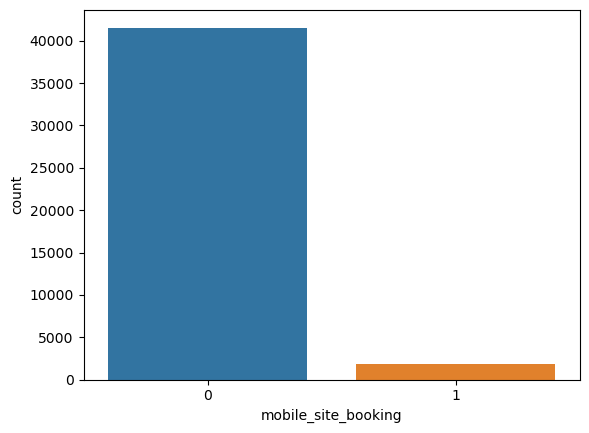

In [138]:
sns.countplot(x=df["mobile_site_booking"]);

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


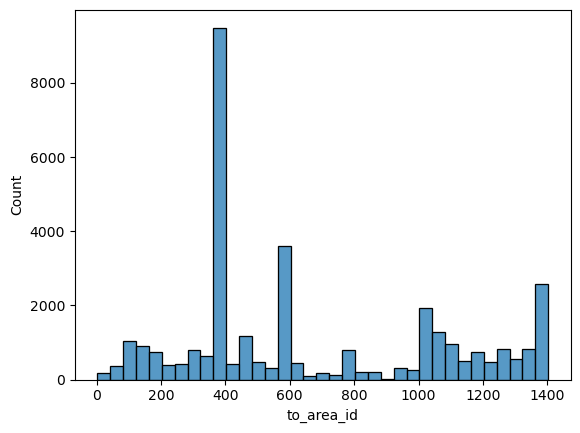

In [139]:
sns.histplot(x=df["to_area_id"]);

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


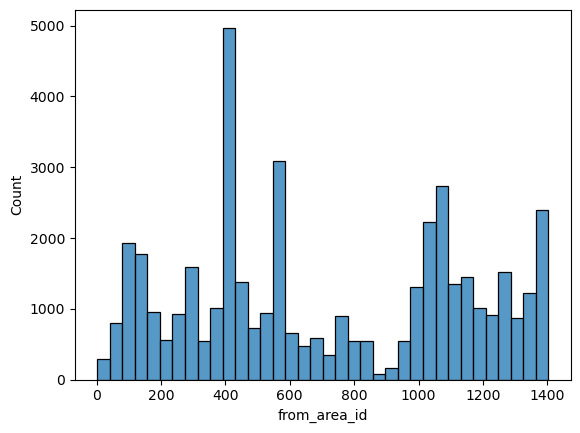

In [140]:
sns.histplot(x=df["from_area_id"]);

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


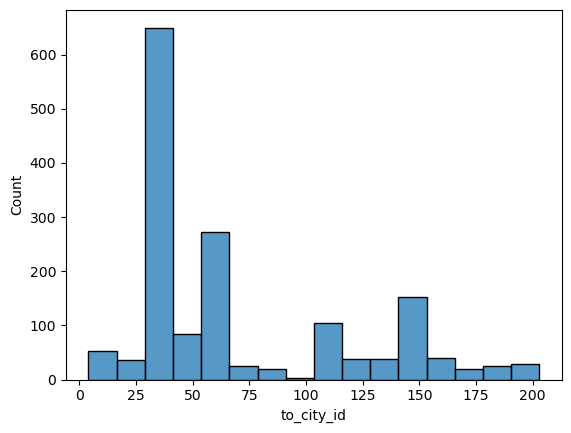

In [141]:
sns.histplot(x=df["to_city_id"]);

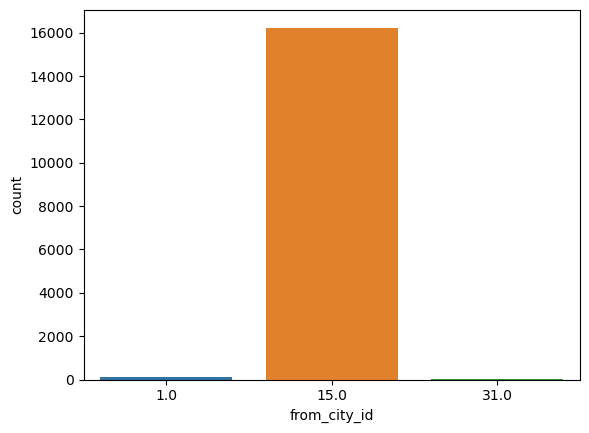

In [142]:
sns.countplot(x=df["from_city_id"]);

#### **Observations**

1. id and user_id columns are not useful because id is a unique id and we can't use user_id for prediction because we have to train model with user behavior not with user_id So, we'll drop both columns.
2. There are a lot of missing values we have to fill those missing values with some meaningful data.
3. The dataset is imbalanced we have to handle this as well.
4. Most of the people who book cabs travel a max of 100 km.
5. Cab books mostly for point to point travel.
6. People travel only in three cities.
7. There are very less people who book cabs using mobile sites.
8. 30-40% of people book cabs using online booking.
9. We have two temporal features booking_created and from date currently both are object we have to change their types.

In [143]:
#droping the id and user_id column
df.drop(["id","user_id"], axis=1, inplace=True)

In [144]:
df.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


#### Filling missing values

In [145]:
df[nan_feat].head()

,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_lat,from_long,to_lat,to_long
0,NaN,83.0,448.0,NaN,NaN,12.924150,77.672290,12.927320,77.635750
1,NaN,1010.0,540.0,NaN,NaN,12.966910,77.749350,12.927680,77.626640
2,NaN,1301.0,1034.0,NaN,NaN,12.937222,77.626915,13.047926,77.597766
3,NaN,768.0,398.0,NaN,NaN,12.989990,77.553320,12.971430,77.639140
4,NaN,1365.0,849.0,NaN,NaN,12.845653,77.677925,12.954340,77.600720


In [146]:
# we are going fill area_id with median 
df["to_area_id"]=df["to_area_id"].fillna(df["to_area_id"].median())
df["from_area_id"]=df["from_area_id"].fillna(df["from_area_id"].median())

In [147]:
df.isna().sum()

vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [148]:
df["from_city_id"].value_counts()

from_city_id
15.0    16233
1.0       106
31.0        6
Name: count, dtype: int64

In [149]:
#filling from_city_id with the most occurance value
df["from_city_id"] = df["from_city_id"].fillna(15.0)

In [150]:
#filling to_city_id with median
df["to_city_id"] = df["to_city_id"].fillna(df["to_city_id"].median())

In [151]:
df.isna().sum()

vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id               0
to_city_id                 0
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [152]:
df["from_lat"] = df["from_lat"].fillna(df["from_lat"].median())
df["from_long"] = df["from_long"].fillna(df["from_long"].median())

In [153]:
df.isna().sum()

vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id               0
to_city_id                 0
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [154]:
df["to_long"].mode()

0    77.70688
Name: to_long, dtype: float64

In [155]:
df["to_lat"].mode()

0    13.19956
Name: to_lat, dtype: float64

In [156]:
#filling these values with the mode
df["to_lat"] = df["to_lat"].fillna(13.19956)
df["to_long"] = df["to_long"].fillna(77.70688)

In [157]:
df.isna().sum()

vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id               0
to_city_id                 0
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [158]:
df.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,NaN,2,83.0,448.0,15.0,49.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,12,NaN,2,1010.0,540.0,15.0,49.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,12,NaN,2,1301.0,1034.0,15.0,49.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,12,NaN,2,768.0,398.0,15.0,49.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,12,NaN,2,1365.0,849.0,15.0,49.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [159]:
def date_correction(a):
    spt = a.split("-")
    result = "/".join(spt)
    return result

In [160]:
df["from_date"] = df["from_date"].apply(lambda x: date_correction(x))

In [161]:
df["booking_created"] = df["booking_created"].apply(lambda x: date_correction(x))

In [170]:
a = df["from_date"].loc[100]
a

'01/02/2013 16:00'

In [171]:
a.split()[1].split(':')

['16', '00']

In [166]:
df["from_date_month"] = df["from_date"].apply(lambda x: x.split()[0].split('/')[0])
df["from_date_day"] = df["from_date"].apply(lambda x: x.split()[0].split('/')[1])
df["from_date_year"] = df["from_date"].apply(lambda x: x.split()[0].split('/')[2])

In [172]:
df["from_date_hour"] = df["from_date"].apply(lambda x: x.split()[1].split(':')[0])
df["from_date_minutes"] = df["from_date"].apply(lambda x: x.split()[1].split(':')[1])

In [175]:
df.drop("from_date", axis=1, inplace=True)

In [176]:
df["booking_created"].head()

0    01/01/2013 01:39
1    01/01/2013 02:25
2    01/01/2013 03:08
3    01/01/2013 04:39
4    01/01/2013 07:53
Name: booking_created, dtype: object

In [177]:
df["booking_created_month"] = df["booking_created"].apply(lambda x: x.split()[0].split('/')[0])
df["booking_created_day"] = df["booking_created"].apply(lambda x: x.split()[0].split('/')[1])
df["booking_created_year"] = df["booking_created"].apply(lambda x: x.split()[0].split('/')[2])

In [178]:
df["booking_created_hour"] = df["booking_created"].apply(lambda x: x.split()[1].split(':')[0])
df["booking_created_minutes"] = df["booking_created"].apply(lambda x: x.split()[1].split(':')[1])

In [201]:
df["booking_created_day"].dtypes

dtype('O')

In [202]:
obj_feat = [feat for feat in df.columns if df[feat].dtypes =='O']

In [204]:
for feat in obj_feat:
    df[feat] = df[feat].astype(int)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         43431 non-null  int64  
 1   package_id               43431 non-null  float64
 2   travel_type_id           43431 non-null  int64  
 3   from_area_id             43431 non-null  float64
 4   to_area_id               43431 non-null  float64
 5   from_city_id             43431 non-null  float64
 6   to_city_id               43431 non-null  float64
 7   online_booking           43431 non-null  int64  
 8   mobile_site_booking      43431 non-null  int64  
 9   from_lat                 43431 non-null  float64
 10  from_long                43431 non-null  float64
 11  to_lat                   43431 non-null  float64
 12  to_long                  43431 non-null  float64
 13  Car_Cancellation         43431 non-null  int64  
 14  from_date_month       

In [179]:
df.drop("booking_created", axis=1, inplace=True)

### Result:
1. Almost everything is done data analysis to feature engineering.
2. we have filled in all the missing values except package_id.
3. Change the type of temporal variables.

## Package_id
- For package_id first we are going calculate the distance using given latitude and longitude in KM, then we will analyz the package_id with the distance feature because package_id description says that it is based on distance e.g. 1 for 40km, 2 for 80km.

In [206]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a)) 
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [181]:
df[['from_lat', 'to_lat', 'from_long', 'to_long']].values

array([[12.92415 , 12.92732 , 77.67229 , 77.63575 ],
       [12.96691 , 12.92768 , 77.74935 , 77.62664 ],
       [12.937222, 13.047926, 77.626915, 77.597766],
       ...,
       [13.07557 , 13.19956 , 77.55904 , 77.70688 ],
       [12.96897 , 12.93823 , 77.59456 , 77.62289 ],
       [12.97672 , 13.19956 , 77.64927 , 77.70688 ]])

In [182]:
# using above function we will calculate the distance and will create a new feature called distance
dist = []
for i in df[['from_lat', 'to_lat', 'from_long', 'to_long']].values:
    di = distance(*i)
    dist.append(di)

In [183]:
df["distance"] = dist

In [184]:
df.head(2)

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,...,from_date_day,from_date_year,from_date_hour,from_date_minutes,booking_created_month,booking_created_day,booking_created_year,booking_created_hour,booking_created_minutes,distance
0,28,NaN,2,83.0,448.0,15.0,49.0,0,0,12.92415,...,01,2013,02,00,01,01,2013,01,39,3.975764
1,12,NaN,2,1010.0,540.0,15.0,49.0,0,0,12.96691,...,01,2013,09,00,01,01,2013,02,25,13.995033


In [185]:
df["distance"].max()

59.841841776299894

<Axes: xlabel='package_id', ylabel='distance'>

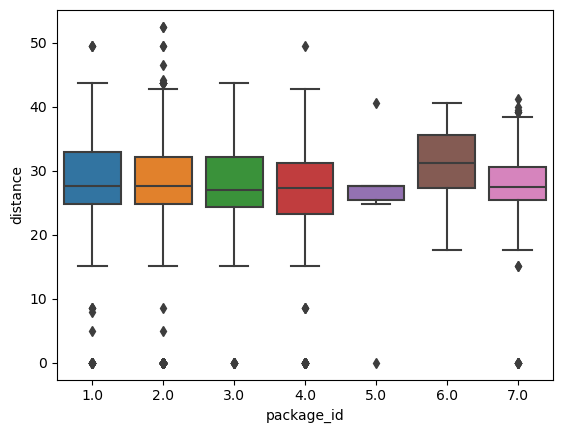

In [186]:
sns.boxplot(x=df["package_id"], y = df["distance"])

AttributeError: 'numpy.int64' object has no attribute 'startswith'

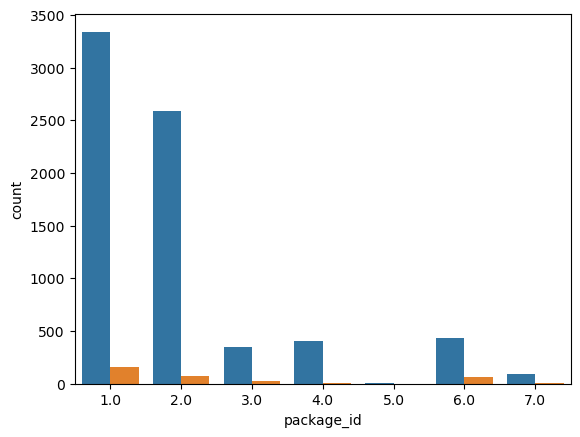

In [53]:
sns.countplot(x = df["package_id"], hue=df["Car_Cancellation"])

In [187]:
df["package_id"].value_counts()

package_id
1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: count, dtype: int64

In [188]:
df["package_id"].isna().sum()

35881

In [189]:
df["travel_type_id"].value_counts()

travel_type_id
2    34292
3     7550
1     1589
Name: count, dtype: int64

In [190]:
df["package_id"] = df["package_id"].fillna(1.0)

In [191]:
df.isna().sum()

vehicle_model_id           0
package_id                 0
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id               0
to_city_id                 0
online_booking             0
mobile_site_booking        0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
from_date_month            0
from_date_day              0
from_date_year             0
from_date_hour             0
from_date_minutes          0
booking_created_month      0
booking_created_day        0
booking_created_year       0
booking_created_hour       0
booking_created_minutes    0
distance                   0
dtype: int64

In [192]:
#droping distance feature
# df.drop("distance", axis=1,inplace=True)

#### Package_id Observation:
- We have calculated the distance but the max distance covered by cab is approx 60km.
- We haven't found any relation with distance and package_id.
- We have checked the relation with our target variable.
- We have also checked the relation with travel_type_id and we have found that people mostly book cabs for point to point travel and the most occurance of value present in package_id is 1.0 and 1.0 means 40km so, we have filled the package_id value 1.0.

In [207]:
df.corr()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,...,from_date_day,from_date_year,from_date_hour,from_date_minutes,booking_created_month,booking_created_day,booking_created_year,booking_created_hour,booking_created_minutes,distance
vehicle_model_id,1.000000,0.025990,-0.034539,-0.023571,-0.042143,-0.031214,0.042105,0.015371,-0.006961,0.057025,...,0.005133,-0.004254,-0.010376,-0.021140,0.059808,0.000195,NaN,-0.011271,-0.001352,0.077159
package_id,0.025990,1.000000,0.487682,0.006250,-0.069762,0.011043,-0.017302,-0.042666,-0.028668,-0.059091,...,0.005082,-0.002056,-0.071555,-0.026452,0.150480,-0.004010,NaN,0.013694,-0.012700,0.198065
travel_type_id,-0.034539,0.487682,1.000000,0.026319,-0.088492,0.115965,-0.181687,-0.069832,-0.022955,-0.093810,...,0.002893,-0.008936,0.033015,-0.005083,0.005512,-0.001167,NaN,-0.046389,-0.006651,0.277594
from_area_id,-0.023571,0.006250,0.026319,1.000000,0.006234,0.011608,-0.007848,0.015397,-0.010361,-0.110502,...,0.013833,-0.000098,-0.005615,-0.012759,0.022036,0.015791,NaN,-0.005092,0.006082,-0.083567
to_area_id,-0.042143,-0.069762,-0.088492,0.006234,1.000000,0.012584,-0.019717,0.010430,-0.006913,0.048673,...,0.002289,0.001167,0.111027,0.023901,0.021689,0.010938,NaN,-0.008068,0.011199,-0.263196
from_city_id,-0.031214,0.011043,0.115965,0.011608,0.012584,1.000000,-0.081066,-0.062363,0.005694,-0.024428,...,-0.006731,0.000371,0.030024,0.021781,0.035095,-0.001288,NaN,0.001477,-0.005806,-0.003031
to_city_id,0.042105,-0.017302,-0.181687,-0.007848,-0.019717,-0.081066,1.000000,0.005256,-0.002345,0.004278,...,-0.002851,0.021657,-0.045727,-0.041375,-0.001811,-0.000263,NaN,-0.006957,0.005526,0.035677
online_booking,0.015371,-0.042666,-0.069832,0.015397,0.010430,-0.062363,0.005256,1.000000,-0.156546,0.042696,...,-0.004597,-0.000318,-0.031959,0.017375,0.106877,-0.005183,NaN,0.064584,-0.003297,0.058111
mobile_site_booking,-0.006961,-0.028668,-0.022955,-0.010361,-0.006913,0.005694,-0.002345,-0.156546,1.000000,0.035412,...,0.000620,-0.001767,0.005322,0.017017,0.092803,-0.002577,NaN,0.023631,0.000102,0.004945
from_lat,0.057025,-0.059091,-0.093810,-0.110502,0.048673,-0.024428,0.004278,0.042696,0.035412,1.000000,...,0.006214,0.008184,0.060761,0.041887,0.043010,0.006837,NaN,-0.009024,0.005298,0.013864


In [210]:
df.drop("booking_created_year", axis=1,inplace=True)

In [211]:
X = df.drop("Car_Cancellation", axis=1)
y = df["Car_Cancellation"]

In [212]:
from sklearn.model_selection import train_test_split

In [229]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=0,
)  
X, y = ros.fit_resample(X, y)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [232]:
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8044
           1       0.99      1.00      0.99      8076

    accuracy                           0.99     16120
   macro avg       0.99      0.99      0.99     16120
weighted avg       0.99      0.99      0.99     16120

